In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

This is an analysis of Stack Overflow Annual Developer Survey

# The Task

    - How many developers participated in this survey
    - Find the top 10 countries participating developers are from.
    - How many are from Nigeria?
    - What's the average age the Nigerian developers wrote their first code?
    - What's the average age of the Nigerian developers?
    - What are the kind of employments they are in?
    - What's the gender distribution?
    - What majors did they study in school?
    - What languages have they worked with?
    - What's the average number of languages they have worked with?
    - What's the average number of years of experience of the Nigerian developer?
   

# Kicker

    1. How many developers are women, age below 25 and earn a living from dev?
    2. What are the 10 most popular languages among Naija developers?
    
    PS: Minus gender, ignore missing values in columns in view.

In [3]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
schema = pd.read_csv('survey_results_schema.csv')
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [7]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


* How many developers participated in this survey?

In [8]:
df1 = df['Respondent']
print('A total of ' + str(df1.count()) + ' developers participated in this survey.')

A total of 64461 developers participated in this survey.


* Find top 10 countries participating developers are from.

In [9]:
df2 = df.Country.value_counts()
print('The top 10 countries participating developers came from are:')
df2.head(10)

The top 10 countries participating developers came from are:


United States     12469
India              8403
United Kingdom     3896
Germany            3890
Canada             2191
France             1898
Brazil             1818
Netherlands        1343
Poland             1278
Australia          1208
Name: Country, dtype: int64

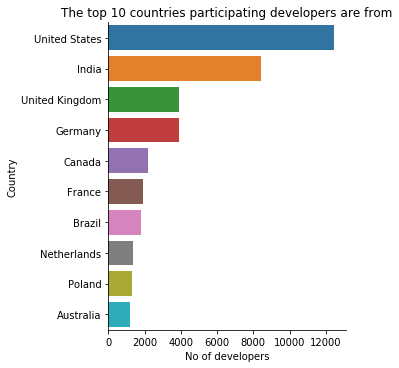

In [10]:
Top_Countries = pd.DataFrame(df2.head(10))
Top_Countries.reset_index(inplace=True)
Top_Countries.columns = ['Country', 'No of developers']
sns.catplot(x='No of developers', y='Country', data = Top_Countries, kind='bar')
plt.title('The top 10 countries participating developers are from')
plt.xlabel('No of developers')
plt.ylabel('Country')
plt.show()

* How many are from Nigeria?

In [11]:
df3 = df[df['Country'] == 'Nigeria']
df4 = df3['Country']
print(str(df4.count()) + ' developers from Nigeria participated in this survey.')

593 developers from Nigeria participated in this survey.


* What is the average age the Nigerian developer wrote their first code?

In [12]:
df5 = df3['Age1stCode']
df6 = pd.to_numeric(df5, errors='coerce')
print('The average age the Nigerian developers wrote their first code is ' + str(df6.mean()) + '.')

The average age the Nigerian developers wrote their first code is 19.86159844054581.


* What's the average age of the Nigerian developers?

In [13]:
df7 = df3['Age']
print('The average age of the Nigerian developers is ' + str(df7.mean()) + '.')

The average age of the Nigerian developers is 25.67048710601719.


* What are the kinds of employment they are in?

In [14]:
df8 = df3['Employment']
print('The kinds of employment of the Nigerian developers that participated in this survey are:')
df8.value_counts()

The kinds of employment of the Nigerian developers that participated in this survey are:


Employed full-time                                      187
Student                                                 135
Not employed, but looking for work                      118
Independent contractor, freelancer, or self-employed    109
Employed part-time                                       36
Not employed, and not looking for work                    4
Name: Employment, dtype: int64

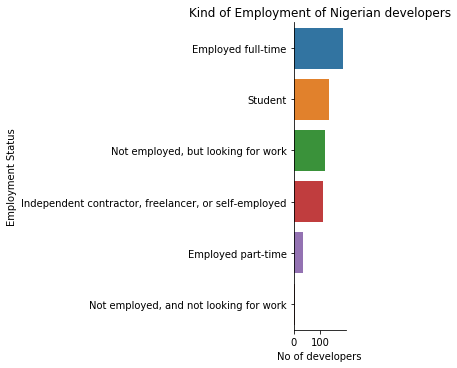

In [19]:
Employment = pd.DataFrame(df8.value_counts())
Employment.reset_index(inplace=True)
Employment.columns = ['Employment Status', 'Count']
sns.catplot(x='Count', y='Employment Status', data = Employment, kind='bar')
plt.title('Kind of Employment of Nigerian developers')
plt.xlabel('No of developers')
plt.ylabel('Employment Status')
plt.show()

* What's the gender distribution?

In [15]:
df9 = df3['Gender']
print('The gender distribution of the Nigerian developers that participated in this survey is:')
df9[df3['Gender'] == 'Non-binary, genderqueer, or gender non-conforming'] = 'Non-Binary/Genderqueer'
df9[df3['Gender'].isnull()==True] = 'None'
df9.value_counts()

The gender distribution of the Nigerian developers that participated in this survey is:


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

Man                       408
None                      151
Woman                      31
Woman;Man                   2
Non-Binary/Genderqueer      1
Name: Gender, dtype: int64

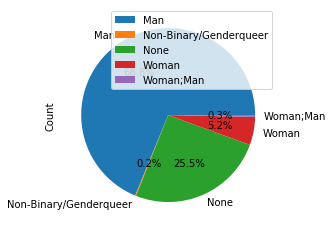

In [16]:
Gender = pd.DataFrame(df9.value_counts())
Gender.reset_index(inplace=True)
Gender.columns = ['Gender', 'Count']

Gender = pd.DataFrame(df9.value_counts())
Gender.reset_index(inplace=True)
Gender.columns = ['Gender', 'Count']

Gender.groupby(['Gender']).sum().plot(kind='pie', y='Count', autopct='%1.1f%%')

* What majors did they study in school?

In [17]:
df10 = pd.Series(df3['UndergradMajor'].dropna(), dtype=str)
print('The undergraduate major of the Nigerian developers that participated in this survey are:')
df10.value_counts()

The undergraduate major of the Nigerian developers that participated in this survey are:


Computer science, computer engineering, or software engineering                   192
Another engineering discipline (such as civil, electrical, mechanical, etc.)       62
A natural science (such as biology, chemistry, physics, etc.)                      32
Mathematics or statistics                                                          24
Information systems, information technology, or system administration              23
A business discipline (such as accounting, finance, marketing, etc.)               18
A health science (such as nursing, pharmacy, radiology, etc.)                      10
A humanities discipline (such as literature, history, philosophy, etc.)             9
A social science (such as anthropology, psychology, political science, etc.)        9
Web development or web design                                                       8
I never declared a major                                                            3
Fine arts or performing arts (such as graphic design, 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


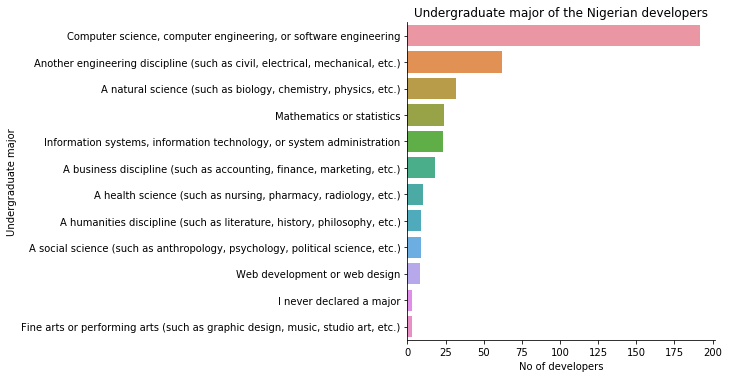

In [18]:
Undergrad_major = pd.DataFrame(df10.value_counts())
Undergrad_major.reset_index(inplace=True)
Undergrad_major.columns = ['Undergrad major', 'Count']
sns.catplot(x='Count', y='Undergrad major', data = Undergrad_major, kind='bar')
plt.title('Undergraduate major of the Nigerian developers')
plt.xlabel('No of developers')
plt.ylabel('Undergraduate major')
plt.show()


* What languages have they worked with?

In [19]:
df11 = df3['LanguageWorkedWith']
print('The Languages Nigerian developers that participated in this survey have worked with are:')
df12 = df11.str.split(';',expand=True,)
df13 = df12[0].append([df12[1], df12[2], df12[3], df12[4], df12[5], df12[6], df12[7], df12[8], df12[9], df12[10], df12[11], df12[12], df12[13], df12[14], df12[15], df12[16]], ignore_index=True)
print(df13.value_counts())

The Languages Nigerian developers that participated in this survey have worked with are:
HTML/CSS                 395
JavaScript               366
SQL                      242
PHP                      218
Python                   192
Java                     174
C#                       100
TypeScript                86
C++                       74
C                         52
Bash/Shell/PowerShell     38
Dart                      37
Kotlin                    30
VBA                       23
R                         15
Go                        15
Assembly                  14
Ruby                      12
Swift                     10
Objective-C                5
Rust                       5
Perl                       4
Haskell                    3
Scala                      2
dtype: int64


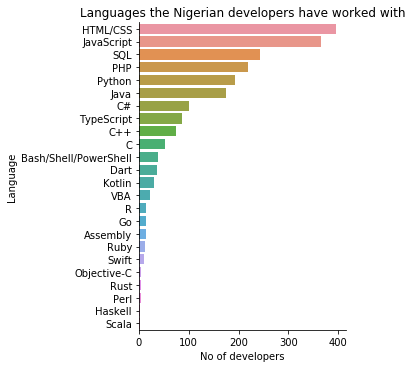

In [20]:
LanguageWorkedWith = pd.DataFrame(df13.value_counts())
LanguageWorkedWith.reset_index(inplace=True)
LanguageWorkedWith.columns = ['Language', 'Count']
sns.catplot(x='Count', y='Language', data = LanguageWorkedWith, kind='bar')
plt.title('Languages the Nigerian developers have worked with')
plt.xlabel('No of developers')
plt.ylabel('Language')
plt.show()

* What's the average number of languages they have worked with?

In [21]:
df14 = df13.value_counts()
print('The average number of languages Nigerian developers have worked with is ' + str(round(df14.sum()/df4.count())) + '.')

The average number of languages Nigerian developers have worked with is 4.0.


* What's the average number of years of experience of Nigerian developers?

In [22]:
df15 = df3['YearsCodePro']
df16 = df15.replace('Less than 1 year', 1)
df17 = pd.to_numeric(df16, errors='coerce')
print('The average number of years of experience of the Nigerian developers that participated in this survey is ' + str(df17.mean()) + 'years.')

The average number of years of experience of the Nigerian developers that participated in this survey is 4.062761506276151years.


# * Kicker

* How many developers are women, age below 25 and earn a living from devs?

In [24]:
df18 = df3[df3['MainBranch'] == 'I am a developer by profession']
df19 = df18[df3['Age'] < 25]
df20 = df19[df3['Gender'] == 'Woman']
print('Of the participants of this survey, only ' + str(df20['Respondent'].count()) + ' woman is below 25 years of age and is earning her living as a developer.')

Of the participants of this survey, only 1 woman is below 25 years of age and is earning her living as a developer.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


* What are the 10 most popular languages among Naija developers

In [25]:
df21 = pd.DataFrame(df14)
df21.reset_index(inplace=True)
df21.columns = ['Language', 'Count']
print('The ten most popular languages among Nigerian developers are:')
df21.head(10)

The ten most popular languages among Nigerian developers are:


,Language,Count
0,HTML/CSS,395
1,JavaScript,366
2,SQL,242
3,PHP,218
4,Python,192
5,Java,174
6,C#,100
7,TypeScript,86
8,C++,74
9,C,52


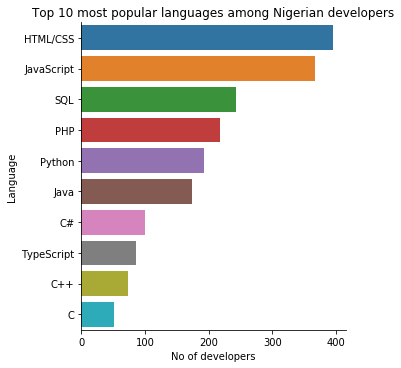

In [26]:
Popular_Language = df21.head(10)
sns.catplot(x='Count', y='Language', data = Popular_Language, kind='bar')
plt.title('Top 10 most popular languages among Nigerian developers')
plt.xlabel('No of developers')
plt.ylabel('Language')
plt.show()